# Importing libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Datasets

In [2]:
df=pd.read_csv(r"C:\Users\anugr\Downloads\Juypter Notebooks\Workshop\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Processing

In [6]:
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [9]:
print("gender-->",df['gender'].unique())
print("Evermarried-->",df['ever_married'].unique())
print("work_type-->",df['work_type'].unique())
print("Residence_type-->",df['Residence_type'].unique())
print("smoking_status-->",df['smoking_status'].unique())

gender--> ['Male' 'Female' 'Other']
Evermarried--> ['Yes' 'No']
work_type--> ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type--> ['Urban' 'Rural']
smoking_status--> ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [10]:
df['gender']=df['gender'].map({'Male':0,'Female':1,'Other':2})
df['ever_married']=df['ever_married'].map({'Yes':1,"No":0})
df['work_type']=df['work_type'].map({'Private':0 ,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})
df["Residence_type"]=df['Residence_type'].map({'Urban':0, 'Rural':1})
df['smoking_status']=df['smoking_status'].map({'formerly smoked':0,'never smoked':1 ,'smokes':2 ,'Unknown':3})

In [11]:
from sklearn.preprocessing import StandardScaler
X=df.drop('stroke',axis=1)
y=df.stroke
scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[-1.18951055,  1.05143428, -0.32860186, ...,  2.70637544,
         1.00508597, -1.45138793],
       [ 0.83932754,  0.78607007, -0.32860186, ...,  2.12155854,
        -0.09898092, -0.53598527],
       [-1.18951055,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.47253605, -0.53598527],
       ...,
       [ 0.83932754, -0.36384151, -0.32860186, ..., -0.51144264,
         0.22574463, -0.53598527],
       [-1.18951055,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.42370648, -1.45138793],
       [ 0.83932754,  0.03420481, -0.32860186, ..., -0.46086746,
        -0.34577235,  1.29482004]])

# EDA

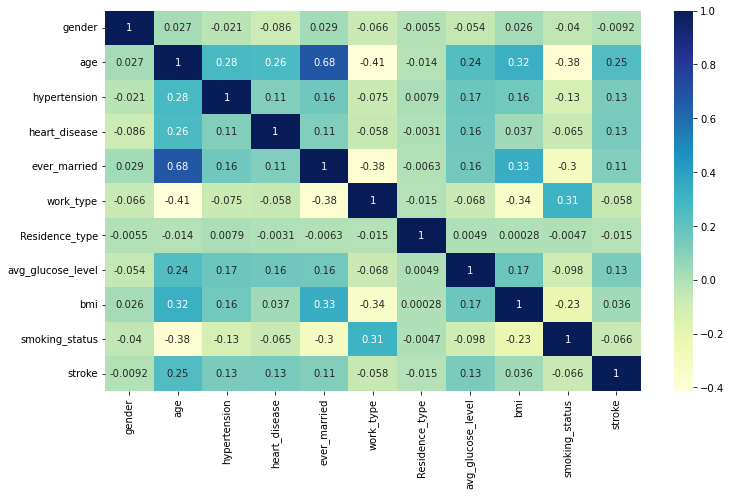

In [12]:
plt.figure(figsize=(12,7))
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='gender', ylabel='stroke'>

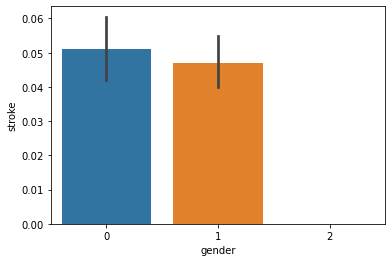

In [13]:
sn.barplot(data=df,x='gender',y='stroke')

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

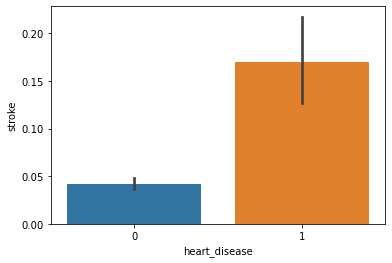

In [14]:
sn.barplot(data=df,x='heart_disease',y='stroke')

<AxesSubplot:xlabel='age', ylabel='stroke'>

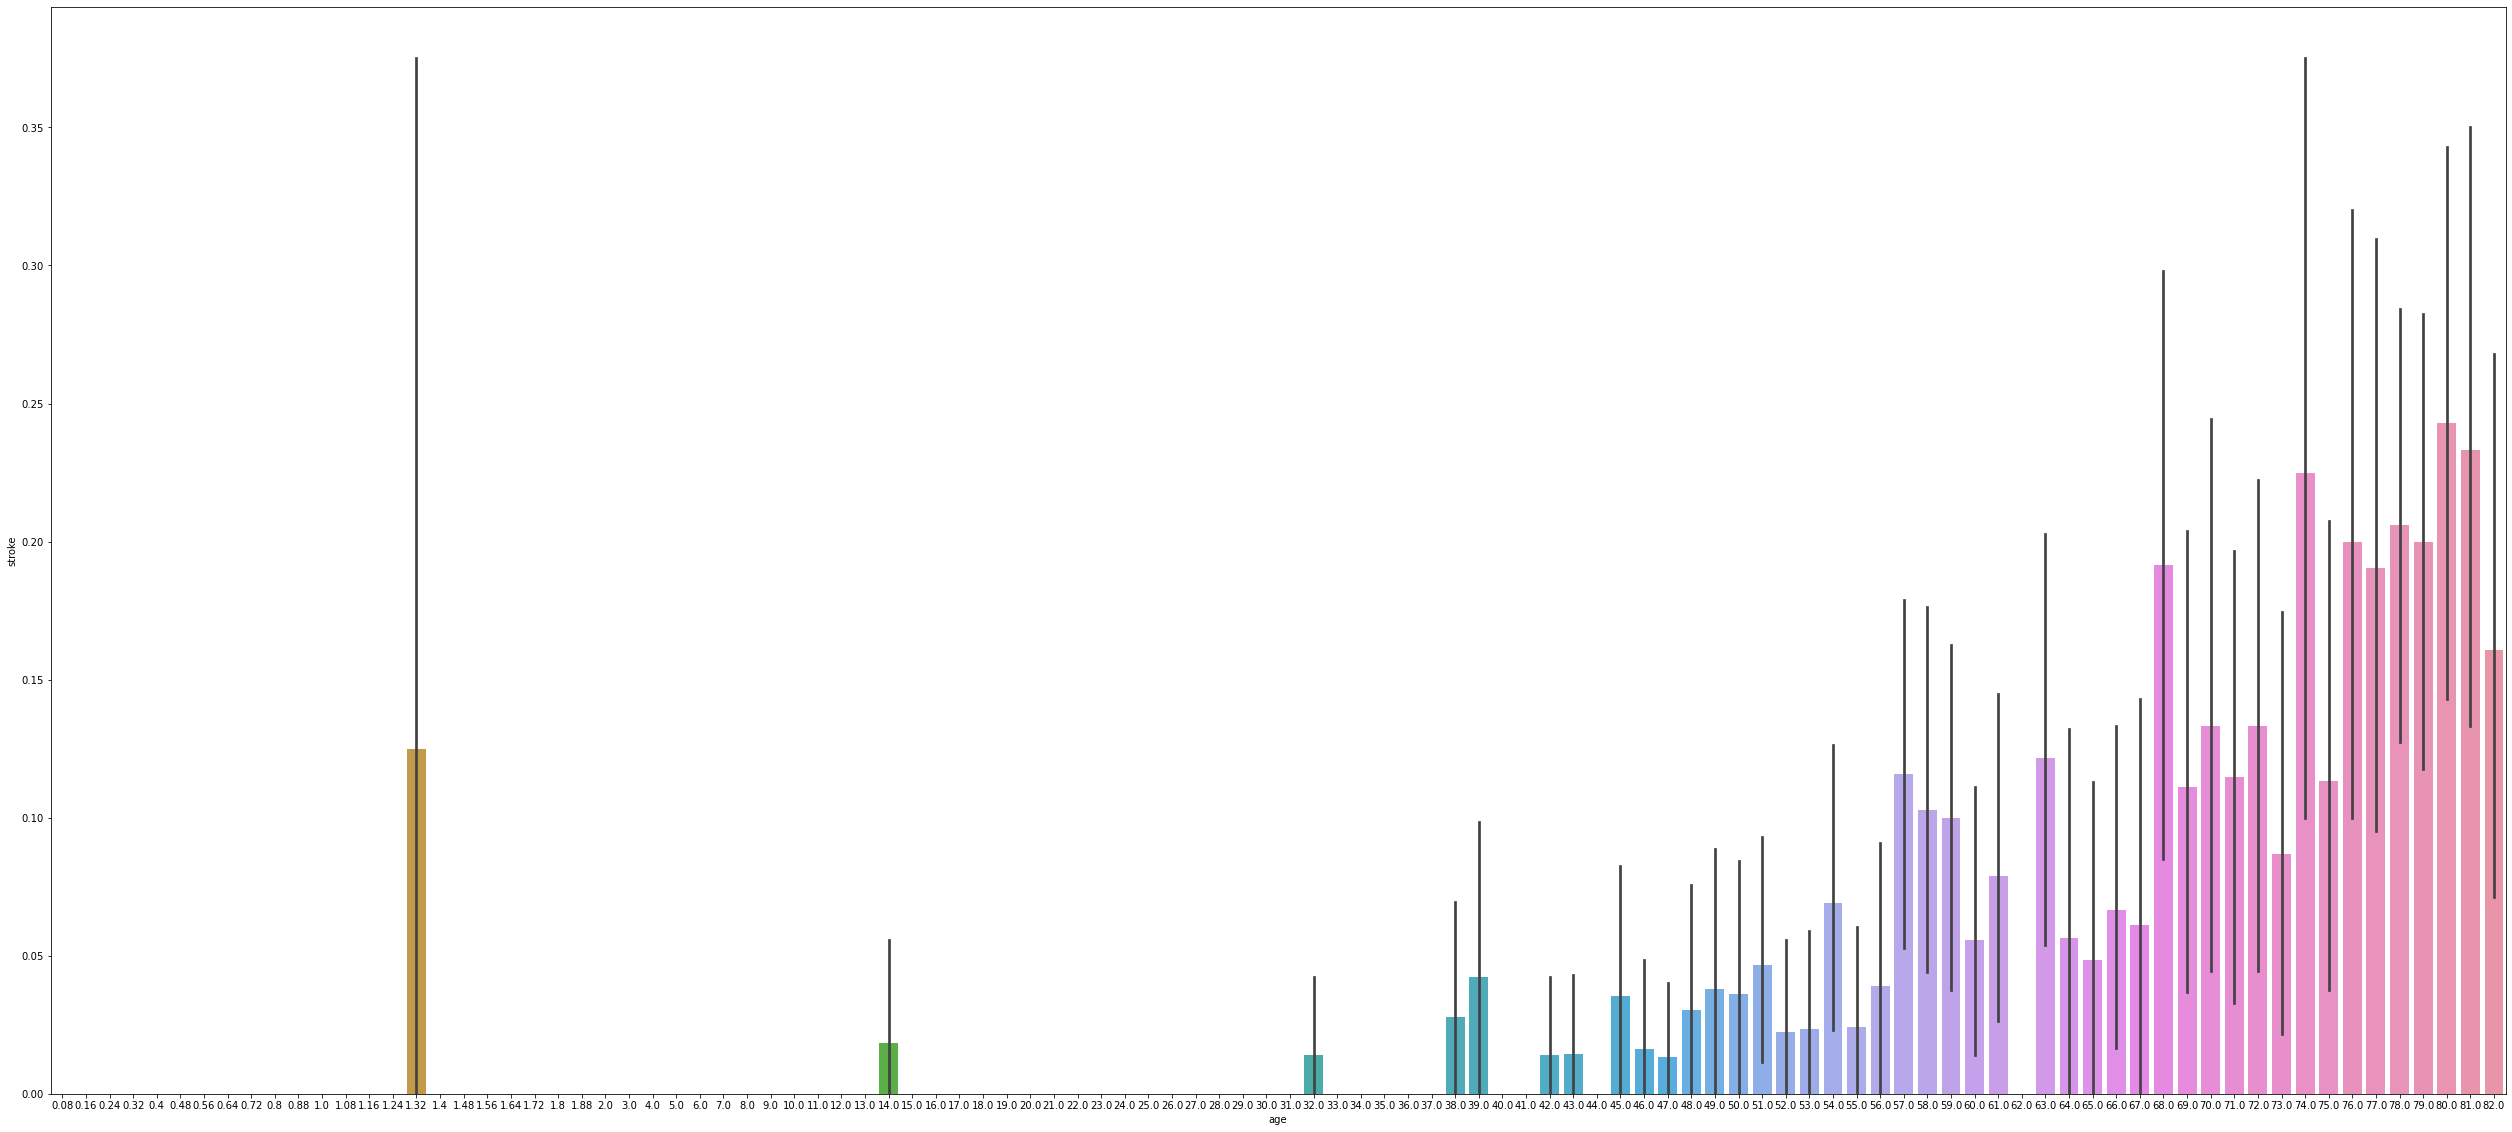

In [15]:
plt.figure(figsize=(44,20))
sn.barplot(data=df,x='age',y='stroke')

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

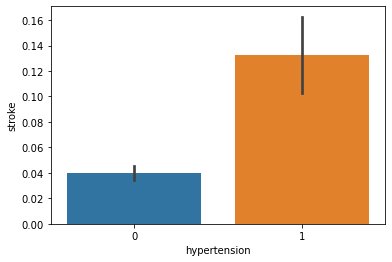

In [16]:
sn.barplot(data=df,x='hypertension',y='stroke')

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

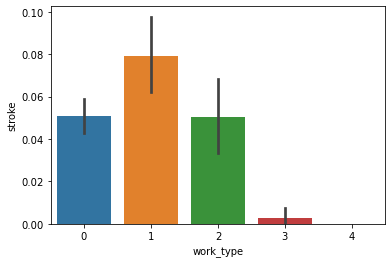

In [17]:
sn.barplot(data=df,x='work_type',y='stroke')

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

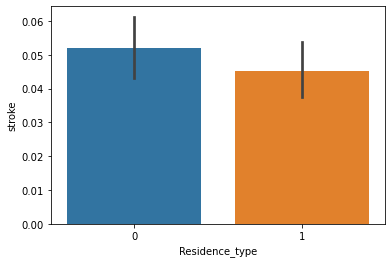

In [18]:
sn.barplot(data=df,x='Residence_type',y='stroke')

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

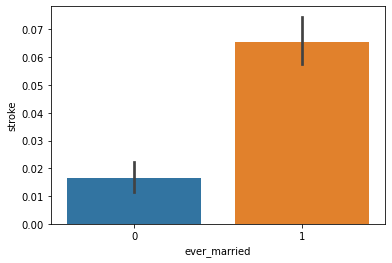

In [19]:
sn.barplot(data=df,x='ever_married',y='stroke')

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

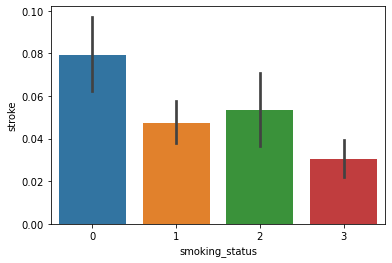

In [20]:
sn.barplot(data=df,x='smoking_status',y='stroke')

# Model Creation 

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.25, shuffle=True)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
Knn = KNeighborsClassifier(n_neighbors = 5)
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'] }
KNN = GridSearchCV(Knn, parameters)
KNN.fit(X_train,y_train)
accuracy_Score=accuracy_score(KNN.predict(X_train),y_train)
print(accuracy_Score)

0.9514613778705637


In [42]:
from sklearn.svm import SVC
svc=SVC()
parameters = {'C':[1.0,2.0,3.0,4.0,1.2,1.3,1.5,1.7],'gamma':['scale','auto']  }
SVC_grid = GridSearchCV(svc, parameters)
SVC_grid.fit(X_train,y_train)
accuracy_score(SVC_grid.predict(X_test), y_test)

0.9530516431924883

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(KNN.predict(X_test), y_test)

array([[1215,   60],
       [   3,    0]], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(svc.predict(X_test), y_test)

array([[1218,   60],
       [   0,    0]], dtype=int64)